<a href="https://colab.research.google.com/github/shreyans312/CSoT-CS_Research_ARIES_X_ACESACM/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model from Scratch using Gradient Descent and Regularisation**
This is linear regression model implemented on the Boston housing dataset to make accurate cost predictions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1)
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# **Data Analysis**

In [ ]:
boston.target.shape

(506,)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


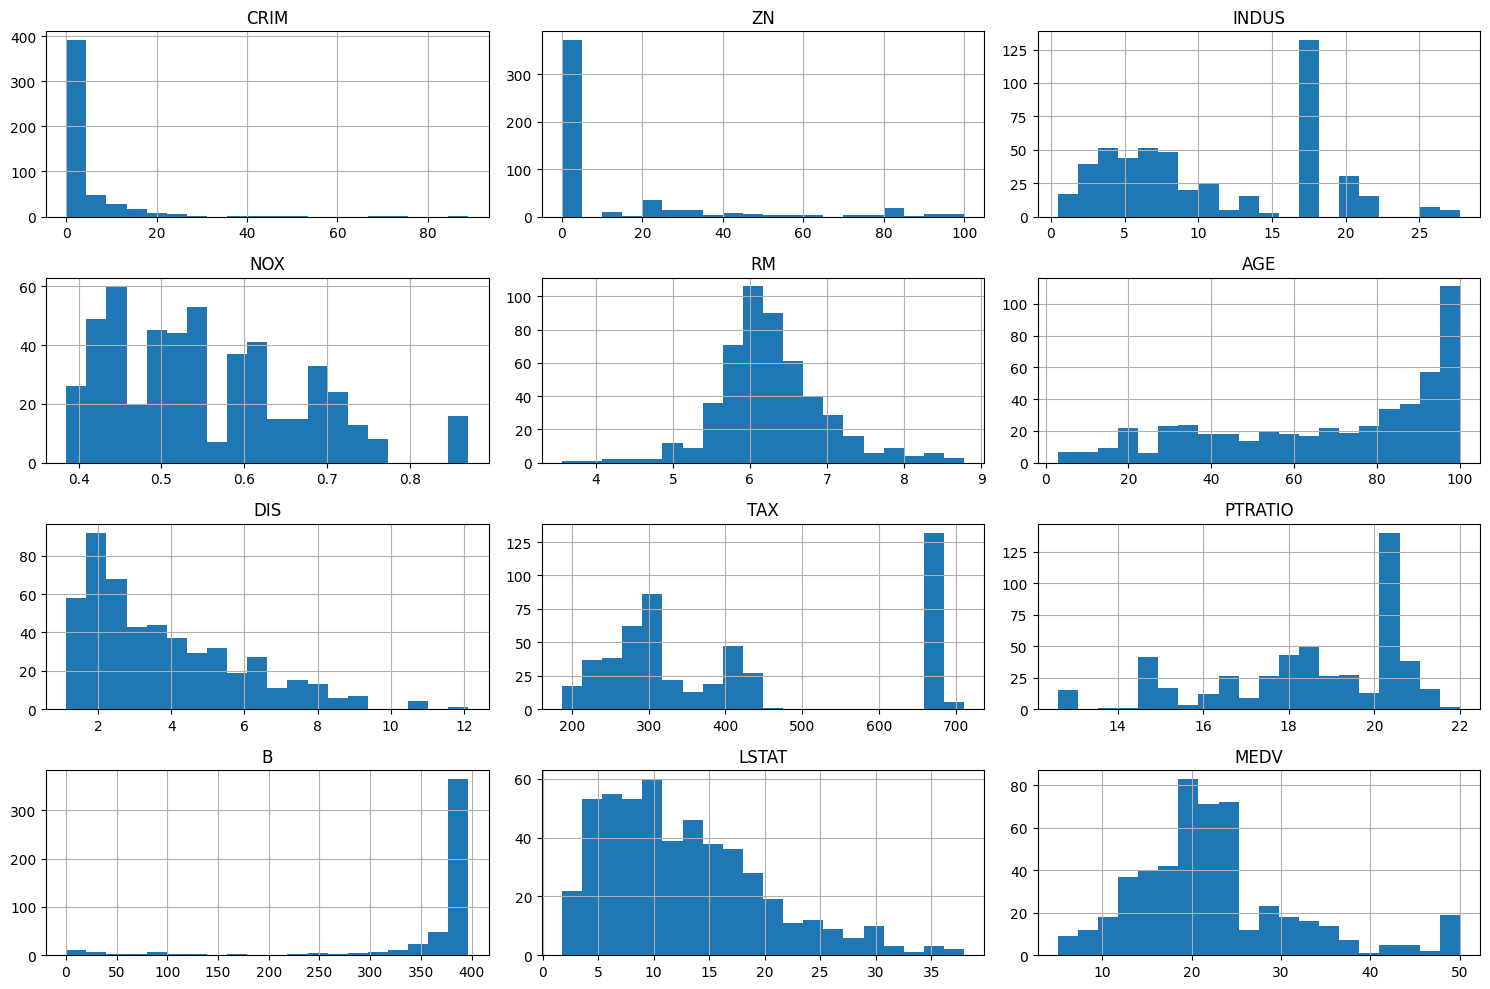

In [ ]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

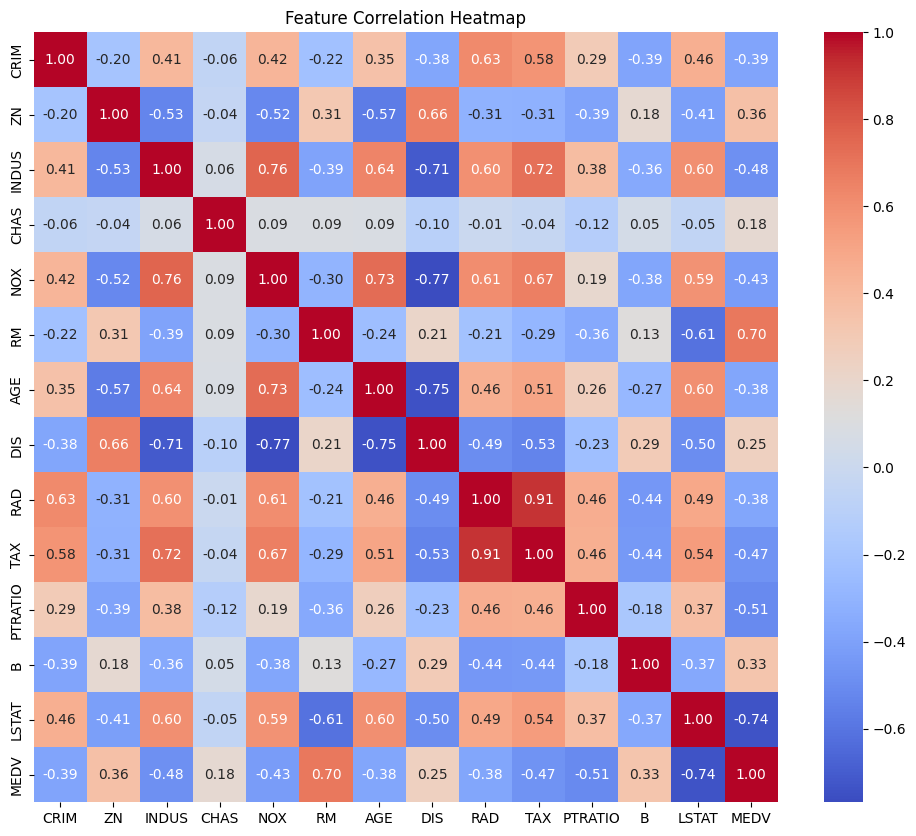

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature Selection**

In [ ]:
cor_matrix = data.corr()
target_corr = cor_matrix['MEDV'].drop('MEDV')
selected_features = target_corr[abs(target_corr) > 0.4].index.tolist()
print("Selected features:", selected_features)

Selected features: ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


In [ ]:
X = data[selected_features].to_numpy()
y = data['MEDV'].to_numpy().reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(404, 6)
(102, 6)
(404, 1)
(102, 1)


# **Z-Score Normalization**

In [ ]:
mean = np.mean(xtrain, axis=0)
std = np.std(xtrain, axis=0)

xtrain_norm = (xtrain - mean) / std
xtest_norm = (xtest - mean) / std

ytrain = ytrain.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

print("Training set shape: ", xtrain_norm.shape)
print("Testing set shape: ", xtest_norm.shape)
print("Training target shape: ", ytrain.shape)
print("Testing target shape: ", ytest.shape)

Training set shape:  (404, 6)
Testing set shape:  (102, 6)
Training target shape:  (404, 1)
Testing target shape:  (102, 1)


# **Linear Regression Implementation**
Applying Regularisation and Using Gradient Descent Algorithm

In [ ]:
def compute_cost(X, Y, weights, lambda_):
    m = X.shape[0]
    c1 = np.sum((X.dot(weights)-Y)**2)/(2*m)
    c2 = (lambda_/(2*m))*np.sum(np.square(weights[1:]))
    return c1+c2

def gradient_descent(X, Y, weights, lr, lambda_):
  m = X.shape[0]
  cost = compute_cost(X, Y, weights, lambda_)
  c1_grad = X.T.dot(X.dot(weights)-Y)/m
  c2_grad = (lambda_/m)*weights
  c2_grad[0] = 0
  weights = weights - lr*(c1_grad + c2_grad)
  return weights, cost


In [ ]:
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float, max_it: int):
    """
    Parameters:
    - X: Input feature matrix (NumPy array)
    - Y: Target vector (NumPy array)
    - lr: Learning rate (float)
    - lambda_: L1 regularization coefficient (float)
    - max_it: Maximum number of iterations (int)
    Returns:
    - weights: Learned model parameters
    - cost_history: List of cost values at each iteration
    """
    m, n = X.shape
    X_b = np.column_stack([np.ones(m), X])
    weights = np.random.normal(0, 0.01, (n+1, 1))
    cost_history = []

    for i in range(max_it):
        weights, cost = gradient_descent(X_b, Y, weights, lr, lambda_)
        cost_history.append(cost)

    return weights, cost_history

lr = 0.01
lambda_ = 0.1
weights, cost_history = linearRegression(xtrain_norm, ytrain, lr, lambda_, max_it = 10000)

In [ ]:
def predict(X, weights):
    X_b = np.column_stack([np.ones(X.shape[0]), X])
    return X_b.dot(weights)

ytrain_pred = predict(xtrain_norm, weights)
ytest_pred = predict(xtest_norm, weights)

for i in range(10):
  print(f"Cost at {i*1000} iteration: ", cost_history[i*1000])


Cost at 0 iteration:  303.19995330717484
Cost at 1000 iteration:  13.441609880617003
Cost at 2000 iteration:  13.439155798540595
Cost at 3000 iteration:  13.439126260632813
Cost at 4000 iteration:  13.439125707992774
Cost at 5000 iteration:  13.439125696926649
Cost at 6000 iteration:  13.439125696703172
Cost at 7000 iteration:  13.439125696698655
Cost at 8000 iteration:  13.439125696698563
Cost at 9000 iteration:  13.439125696698563


# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(ytrain, ytrain_pred)
test_mse = mean_squared_error(ytest, ytest_pred)
train_r2 = r2_score(ytrain, ytrain_pred)
test_r2 = r2_score(ytest, ytest_pred)

print(f"\nModel Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")


Model Performance:
Training MSE: 26.8701
Testing MSE: 27.7936
Training R²: 0.6907
Testing R²: 0.6210


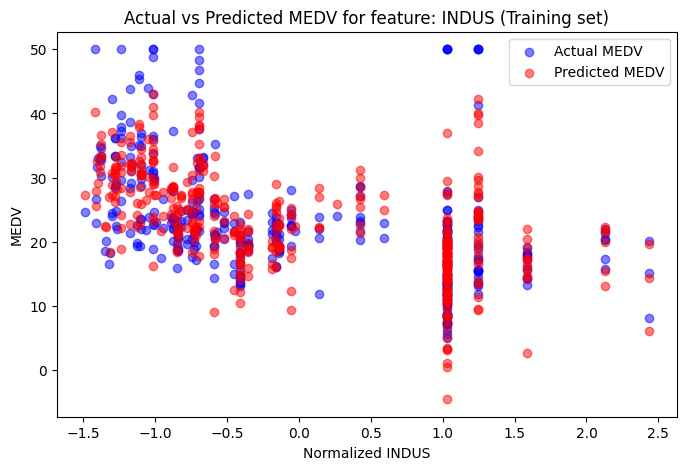

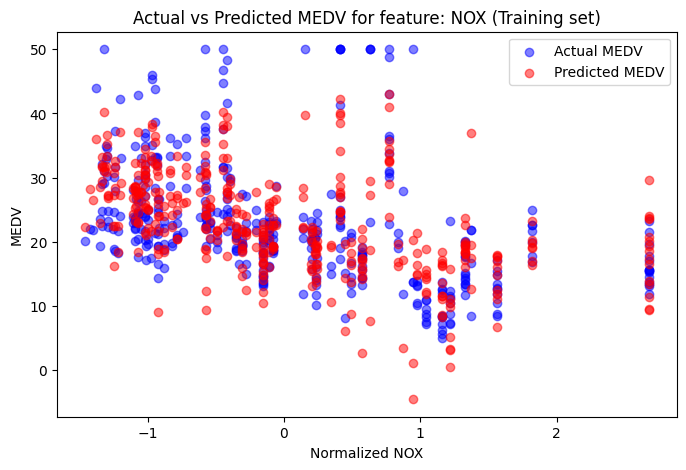

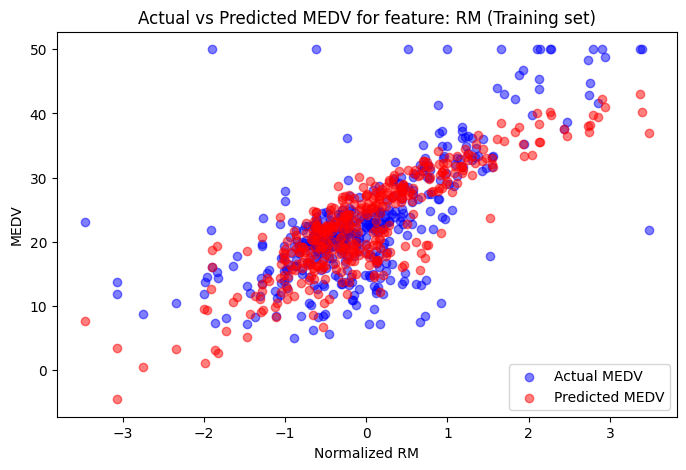

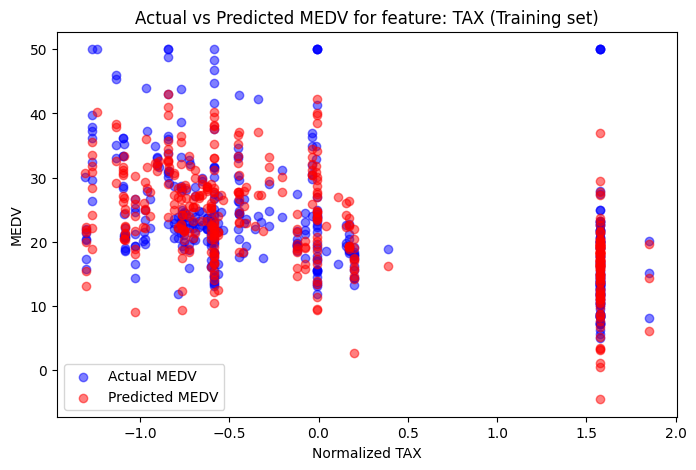

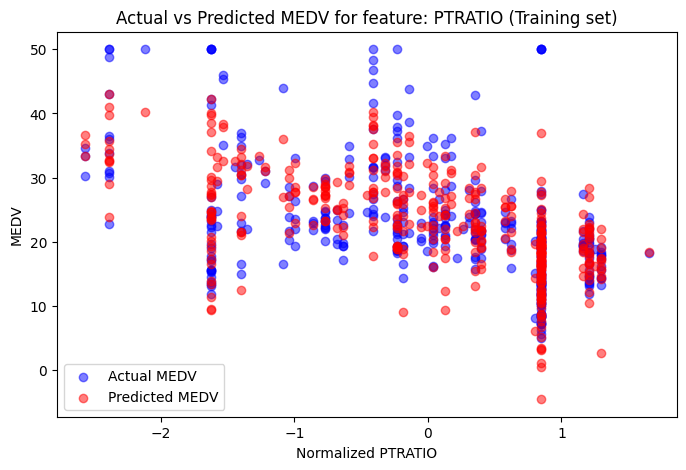

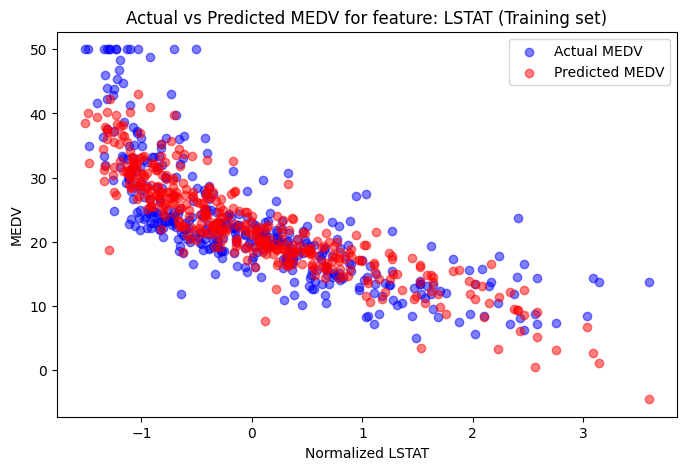

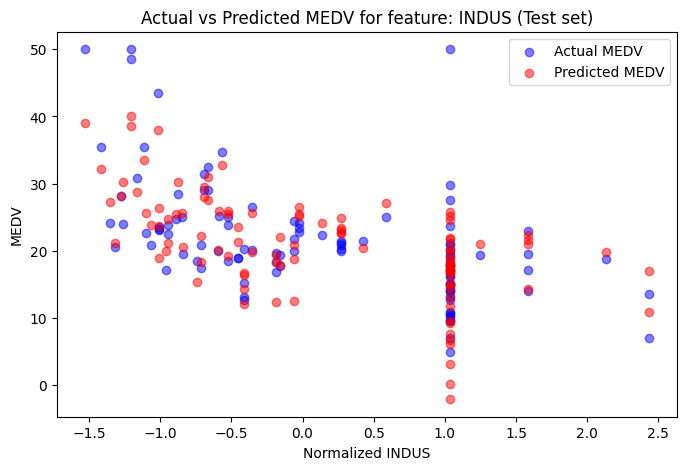

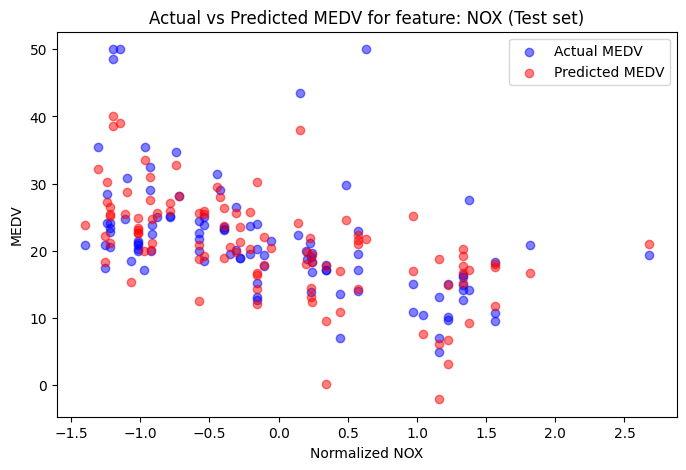

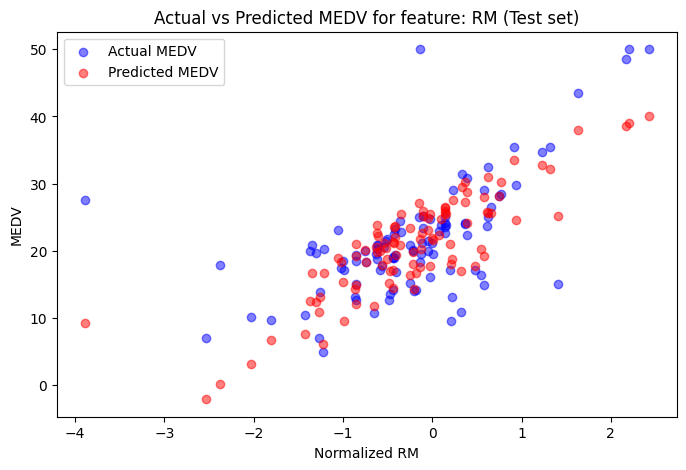

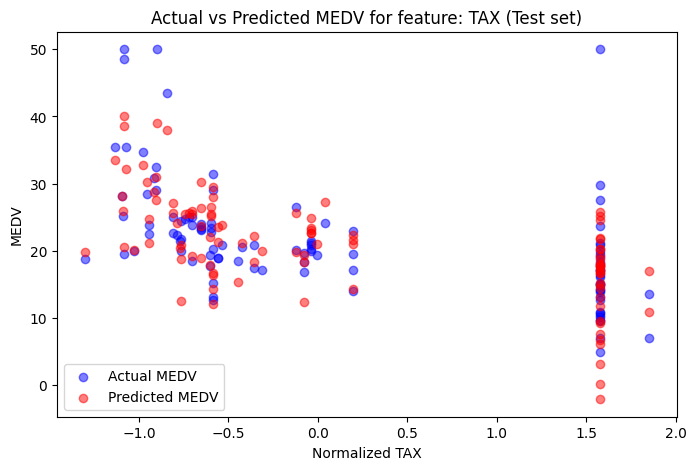

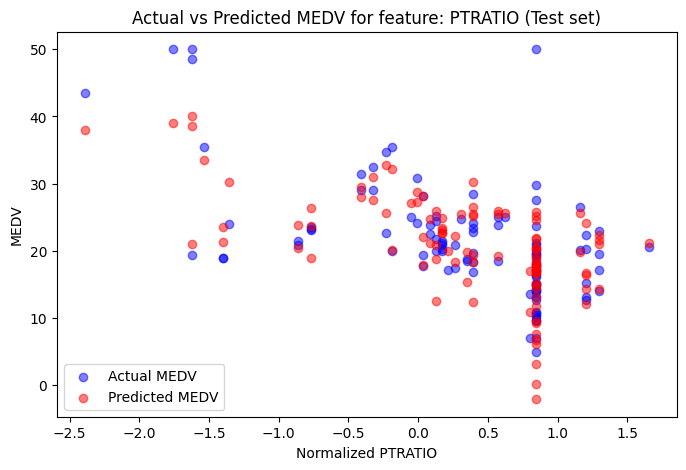

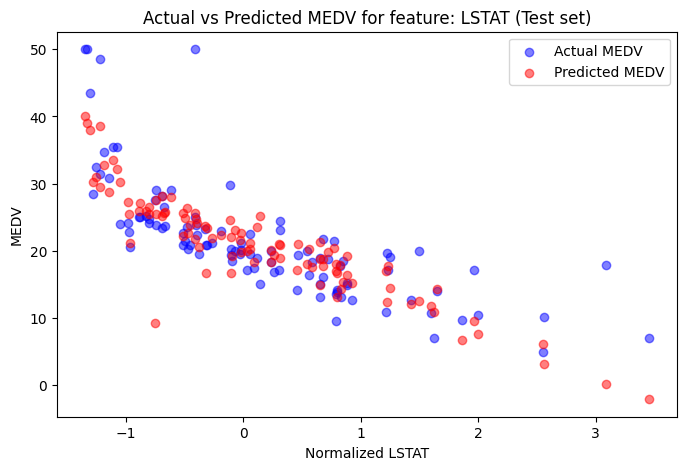

In [ ]:
# Plot for training data
for i, feature in enumerate(selected_features):
    plt.figure(figsize=(8,5))
    plt.scatter(xtrain_norm[:, i], ytrain, color='blue', alpha=0.5, label='Actual MEDV')
    plt.scatter(xtrain_norm[:, i], ytrain_pred, color='red', alpha=0.5, label='Predicted MEDV')
    plt.xlabel(f'Normalized {feature}')
    plt.ylabel('MEDV')
    plt.title(f'Actual vs Predicted MEDV for feature: {feature} (Training set)')
    plt.legend()
    plt.show()

# Plot for test data
for i, feature in enumerate(selected_features):
    plt.figure(figsize=(8,5))
    plt.scatter(xtest_norm[:, i], ytest, color='blue', alpha=0.5, label='Actual MEDV')
    plt.scatter(xtest_norm[:, i], ytest_pred, color='red', alpha=0.5, label='Predicted MEDV')
    plt.xlabel(f'Normalized {feature}')
    plt.ylabel('MEDV')
    plt.title(f'Actual vs Predicted MEDV for feature: {feature} (Test set)')
    plt.legend()
    plt.show()